In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('data/immo_cleaned_20220525.csv') # Daten einlesen: Dataframe bilden

In [4]:
df.head(3)

,zip,area,rooms,qm_price_avg,price
0,10587,74.72,3.0,4939.13,350000.0
1,10627,24.05,1.0,5748.76,219000.0
2,10179,31.00,1.0,12326.04,245000.0


In [5]:
import seaborn as sns

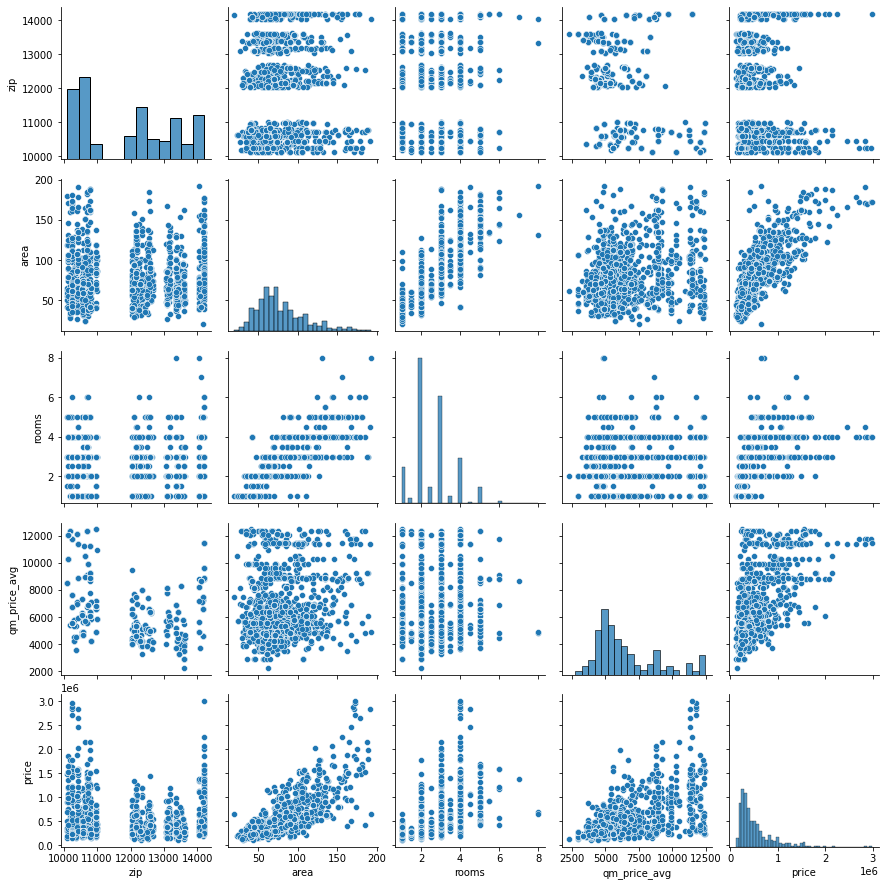

In [6]:
sns.pairplot(df); # Korrelationen visualisieren

In [10]:
# Daten aufsplitten: 25% Test-Daten
from sklearn.model_selection import train_test_split

X = df.drop('price', axis='columns') # features
y = df.price # label

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=2)

In [20]:
from sklearn.linear_model import LinearRegression, BayesianRidge, LinearRegression, ARDRegression
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor,BaggingRegressor,HistGradientBoostingRegressor

In [21]:
models = [LinearRegression, BayesianRidge, LinearRegression, ARDRegression, AdaBoostRegressor, GradientBoostingRegressor,BaggingRegressor,HistGradientBoostingRegressor]

In [22]:
# verschiedene Modelle ausprobieren
from sklearn.metrics import mean_absolute_error, r2_score
for model in models:
    try:
        reg = model() # ein Modell erstellen
        print(model)
        reg.fit(X_train,y_train) # Modell trainieren
        print('Train R² Score:', r2_score(y_train, reg.predict((X_train)))) # Training Score
        print('Test R² Score:',r2_score(y_test, reg.predict(X_test))) # Testing Score
        print('MAE Testset:', mean_absolute_error(y_test, reg.predict(X_test)))
        print(100*'=') # Trennzeile (hundert mal '=') 
    except:
        print('Error')

<class 'sklearn.linear_model._base.LinearRegression'>
Train R² Score: 0.7788095897335396
Test R² Score: 0.7733466422373013
MAE Testset: 123701.37989344375
<class 'sklearn.linear_model._bayes.BayesianRidge'>
Train R² Score: 0.7786712172866693
Test R² Score: 0.7746228564177979
MAE Testset: 123132.39312507634
<class 'sklearn.linear_model._base.LinearRegression'>
Train R² Score: 0.7788095897335396
Test R² Score: 0.7733466422373013
MAE Testset: 123701.37989344375
<class 'sklearn.linear_model._bayes.ARDRegression'>
Train R² Score: 0.7787729485665252
Test R² Score: 0.77405279174809
MAE Testset: 123355.05230058421
<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>
Train R² Score: 0.7999984799336113
Test R² Score: 0.7763351342690468
MAE Testset: 140685.01439579928
<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
Train R² Score: 0.9199088193857469
Test R² Score: 0.84650448802042
MAE Testset: 87904.29146971964
<class 'sklearn.ensemble._bagging.BaggingRegressor'>
Train R² Score:

In [23]:
# BaggingRegressor hat den kleinsten Fehler: also das beste Modell mit kleinstem Fehler
best_model = BaggingRegressor()
best_model.fit(X_train, y_train)

BaggingRegressor()

In [27]:
# das Modell als File speichern
import joblib
joblib.dump(best_model,'mymodel.pkl') # das Modell konservieren

['mymodel.pkl']

In [28]:
# Das Modell erneut laden und testen
modmod=joblib.load('mymodel.pkl')

In [31]:
import warnings; warnings.filterwarnings('ignore') # Warnings ignorieren
modmod.predict([[10627,24.05,1.0,5748.76]]) # 219000.0 der Preis in Realität

array([221500.])

In [32]:
# Schätzung - Realität
221500 - 219000

2500

In [33]:
# Wir wollen jetzt eine Funktion haben, die von Usern folgende Parameter bekommt:
# PLZ (zip), die Größe der Wohnung in qm (size) und die Zimmeranzahl (rooms)
# Achtung: der User weiß nichts von Quadratmeterpreis!

In [54]:
print(df[['zip','qm_price_avg']].drop_duplicates().set_index('zip').to_dict())

{'qm_price_avg': {10587: 4939.13, 10627: 5748.76, 10179: 12326.04, 10247: 5596.56, 10439: 5961.63, 12047: 4339.24, 12203: 6962.0, 10245: 6722.07, 13158: 6053.52, 12489: 4913.1, 10965: 6577.43, 10585: 5612.76, 13407: 4424.65, 10709: 5597.31, 12205: 5521.95, 12159: 5373.01, 10559: 6340.21, 12524: 5106.86, 13359: 4847.98, 10553: 4669.01, 13505: 8330.04, 12051: 4041.43, 13409: 6403.01, 10315: 4275.19, 10437: 11363.65, 13187: 5423.71, 10717: 6896.99, 14059: 7161.41, 10707: 9136.04, 13595: 2921.4, 10115: 8485.56, 12105: 4904.99, 13156: 5765.94, 12305: 4699.01, 13403: 4268.34, 10117: 10280.77, 12169: 5185.0, 14197: 8898.94, 12309: 3892.79, 10555: 6170.68, 12683: 5085.23, 14193: 8796.39, 13353: 6866.47, 12101: 7705.05, 12555: 4809.85, 12167: 4972.54, 12627: 3639.38, 10243: 11775.01, 10317: 5798.53, 12045: 7255.76, 14167: 7511.79, 13086: 4653.66, 12207: 4443.6, 12587: 6412.85, 12557: 6609.67, 10823: 5897.39, 10551: 4884.1, 13189: 5625.09, 10711: 12353.79, 12351: 3902.15, 13583: 4031.51, 12279: 

In [53]:
# wenn eingegebene plz nicht vorhanden, dann nehmen wir den Median
df['qm_price_avg'].median()

5748.76

In [61]:
def predictor(zip_, size, rooms):
    zip_avg={10587: 4939.13, 10627: 5748.76, 10179: 12326.04, 10247: 5596.56, 10439: 5961.63,
             12047: 4339.24, 12203: 6962.0, 10245: 6722.07, 13158: 6053.52, 12489: 4913.1, 
             10965: 6577.43, 10585: 5612.76, 13407: 4424.65, 10709: 5597.31, 12205: 5521.95, 
             12159: 5373.01, 10559: 6340.21, 12524: 5106.86, 13359: 4847.98, 10553: 4669.01, 
             13505: 8330.04, 12051: 4041.43, 13409: 6403.01, 10315: 4275.19, 10437: 11363.65, 
             13187: 5423.71, 10717: 6896.99, 14059: 7161.41, 10707: 9136.04, 13595: 2921.4, 
             10115: 8485.56, 12105: 4904.99, 13156: 5765.94, 12305: 4699.01, 13403: 4268.34, 
             10117: 10280.77, 12169: 5185.0, 14197: 8898.94, 12309: 3892.79, 10555: 6170.68, 
             12683: 5085.23, 14193: 8796.39, 13353: 6866.47, 12101: 7705.05, 12555: 4809.85, 
             12167: 4972.54, 12627: 3639.38, 10243: 11775.01, 10317: 5798.53, 12045: 7255.76, 
             14167: 7511.79, 13086: 4653.66, 12207: 4443.6, 12587: 6412.85, 12557: 6609.67, 
             10823: 5897.39, 10551: 4884.1, 13189: 5625.09, 10711: 12353.79, 12351: 3902.15, 
             13583: 4031.51, 12279: 4355.6, 12487: 3896.03, 10249: 7626.52, 10825: 7154.9, 
             13053: 4965.49, 10999: 10969.14, 13349: 4794.3, 10405: 12106.37, 10827: 4255.8, 
             10963: 7205.22, 12355: 8010.97, 13591: 4408.55, 13585: 3517.67, 13357: 5862.29, 
             10997: 5898.44, 10625: 8954.34, 14195: 11494.85, 13593: 4375.0, 10407: 6968.85, 
             12623: 6440.68, 13055: 5748.82, 12157: 5366.13, 10119: 12093.75, 14169: 7231.32, 
             13059: 4029.85, 13347: 5201.55, 12621: 4349.12, 12043: 4423.54, 12307: 4213.1, 
             10589: 4682.27, 13088: 7800.1, 12107: 4944.63, 12349: 3253.91, 12055: 5105.08, 
             10365: 4510.33, 14052: 4886.43, 12249: 4185.27, 10409: 7137.88, 12347: 4258.65, 
             13507: 4723.59, 10318: 5313.92, 10969: 12472.03, 12109: 5519.29, 12357: 6732.87, 
             10435: 8905.17, 13127: 5362.39, 10785: 9255.55, 10369: 3566.62, 10777: 6057.74, 
             10719: 5973.96, 12049: 6211.18, 12099: 6081.34, 13467: 3987.79, 13465: 4602.26, 
             14163: 6569.39, 10787: 8899.64, 10623: 11232.16, 14057: 8234.79, 12359: 5263.16, 
             10629: 10511.29, 12527: 7424.93, 14165: 4641.1, 13503: 4782.98, 12103: 5361.56, 
             12247: 4489.24, 12161: 5609.27, 10557: 7306.89, 12435: 5186.65, 13351: 3694.31, 
             12685: 4150.6, 12559: 4256.95, 12619: 6274.11, 10178: 5396.06, 13599: 3848.3, 
             14050: 5671.64, 13089: 8143.17, 10715: 9910.62, 13581: 5813.62, 14109: 8653.43, 
             12057: 9489.8, 13587: 3505.74, 12053: 6613.76, 13509: 4109.59, 14055: 8798.41, 
             14129: 7124.95, 13629: 4470.88, 12059: 4230.09, 12165: 4616.41, 14199: 9662.8, 
             10779: 6392.52, 12277: 4212.55, 10961: 4894.17, 13469: 3612.61, 12437: 5453.54, 
             10781: 11222.55, 13405: 4705.88, 10319: 4508.93, 12163: 7514.38, 12353: 5116.38, 
             10789: 8673.91, 10367: 5346.25, 10783: 7808.99, 10967: 6822.07, 10713: 6761.36, 
             13597: 5513.78, 13589: 2241.94, 13125: 6403.25, 12459: 5111.72, 13627: 4680.85, 
             14089: 3751.59, 12589: 4942.53, 13437: 3294.89}
    qm_avg_price = zip_avg.get(zip_, 5748.76)
    mod=joblib.load('mymodel.pkl') # model laden
    prediction = mod.predict([[zip_, size, rooms, qm_avg_price]])[0]
    return round(prediction,2)

In [62]:
# die Funktion testen
predictor(10627,24.05,1.0)

221500.0

In [63]:
# Die Funktion ist jetzt fertig, wir können sie in einer Web-Anwendung implementieren